In [93]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from string import digits
import seaborn as sns

In [256]:
# importing data, getting dimensions
homes = pd.read_csv("Documents\super_realestate_data.csv")

In [257]:
# remove_digits = str.maketrans('', '', digits) 
# homes['neighborhood'] = homes['street address'].str.translate(remove_digits)
# len(homes['neighborhood'].unique())

In [258]:
# cleaning data and setting types

'''
but can we do this? does it mess up the data?
'''
homes['bath'] = homes['bath'].str.replace("+", "")

homes['bath'] = pd.to_numeric(homes['bath'])
homes['sqft'] = pd.to_numeric(homes['sqft'])
homes['price'] = pd.to_numeric(homes['price'])

In [259]:
corr = homes.corr()
corr

,listing id,postal code,latitude,longitude,price,bed,bath,sqft,garage
listing id,1.000000,-0.083310,0.025101,0.140286,0.039261,-0.045852,0.054466,-0.034258,-0.355067
postal code,-0.083310,1.000000,-0.161395,-0.030644,-0.007555,0.043884,-0.243535,-0.053223,0.406716
latitude,0.025101,-0.161395,1.000000,-0.025073,0.091942,-0.002552,0.245799,0.174477,0.584258
longitude,0.140286,-0.030644,-0.025073,1.000000,-0.037701,0.035183,0.004504,0.023790,-0.708304
price,0.039261,-0.007555,0.091942,-0.037701,1.000000,0.224126,0.486930,0.571033,0.719655
bed,-0.045852,0.043884,-0.002552,0.035183,0.224126,1.000000,0.317310,0.640542,0.666667
bath,0.054466,-0.243535,0.245799,0.004504,0.486930,0.317310,1.000000,0.668414,0.490098
sqft,-0.034258,-0.053223,0.174477,0.023790,0.571033,0.640542,0.668414,1.000000,0.605029
garage,-0.355067,0.406716,0.584258,-0.708304,0.719655,0.666667,0.490098,0.605029,1.000000


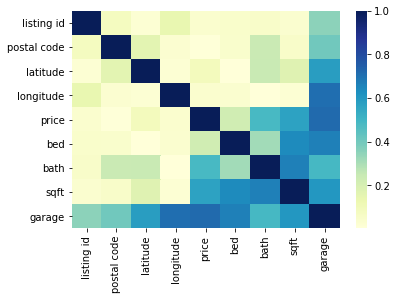

In [260]:
sns.heatmap(abs(corr), 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [261]:
# choosing specific collumns, removing the rest 
homes = homes[['prop type', 'city', 'postal code', 'price', 'bed', 'bath', 'sqft']]

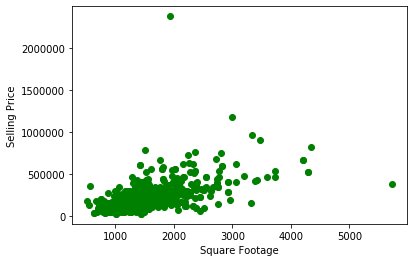

In [262]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['sqft'], homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

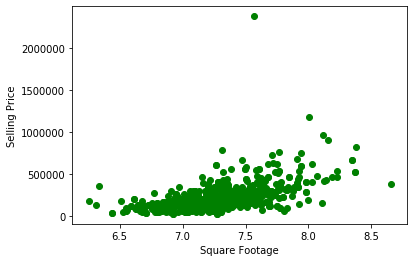

In [263]:
'''
is log better?
'''
plt.scatter(np.log(homes['sqft']), homes['price'], color='g')
plt.xlabel('Square Footage')
plt.ylabel('Selling Price')
plt.show()

In [264]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "log sqft", "sqft"]].corr()

,price,log sqft,sqft
price,1.000000,0.560299,0.571033
log sqft,0.560299,1.000000,0.960966
sqft,0.571033,0.960966,1.000000


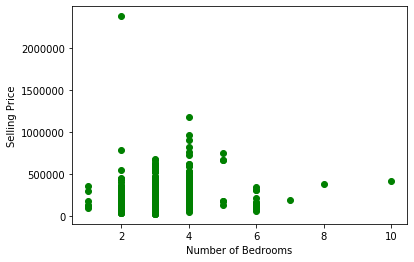

In [265]:
# Plotting the first realtionship between square feet and price
plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by City')

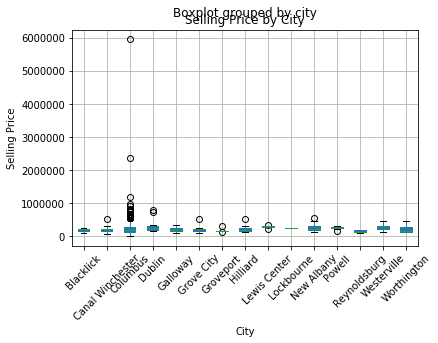

In [266]:
homes.boxplot(column='price', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Selling Price')
plt.title("Selling Price by City")

In [267]:
homes.groupby("city").describe()

postal code                                             \
                       count          mean        std      min      25%   
city                                                                      
Blacklick               15.0  43004.000000   0.000000  43004.0  43004.0   
Canal Winchester        22.0  43110.000000   0.000000  43110.0  43110.0   
Columbus               573.0  43216.823735  15.513540  43081.0  43207.0   
Dublin                  23.0  43016.086957   0.288104  43016.0  43016.0   
Galloway                17.0  43119.000000   0.000000  43119.0  43119.0   
Grove City              17.0  43123.000000   0.000000  43123.0  43123.0   
Groveport                5.0  43125.000000   0.000000  43125.0  43125.0   
Hilliard                19.0  43026.000000   0.000000  43026.0  43026.0   
Lewis Center             5.0  43035.000000   0.000000  43035.0  43035.0   
Lockbourne               2.0  43137.000000   0.000000  43137.0  43137.0   
New Albany              14.0  43054.000000   0.000000  43054.0  43054.0   
Powell                  10.0  43065.000000   0.000000  43065.0  43065.0   
Reynoldsburg            10.0  43068.000000   0.000000  43068.0  43068.0   
Westerville             22.0  43081.000000   0.000000  43081.0  43081.0   
Worthington             12.0  43085.000000   0.000000  43085.0  43085.0   

                                             price                 ...  \
                      50%      75%      max  count           mean  ...   
city                                                               ...   
Blacklick         43004.0  43004.0  43004.0   15.0  188000.000000  ...   
Canal Winchester  43110.0  43110.0  43110.0   22.0  204568.181818  ...   
Columbus          43219.0  43228.0  43240.0  573.0  238278.488656  ...   
Dublin            43016.0  43016.0  43017.0   23.0  287452.173913  ...   
Galloway          43119.0  43119.0  43119.0   17.0  210235.294118  ...   
Grove City        43123.0  43123.0  43123.0   17.0  212694.117647  ...   
Groveport         43125.0  43125.0  43125.0    5.0  182460.000000  ...   
Hilliard          43026.0  43026.0  43026.0   19.0  213657.894737  ...   
Lewis Center      43035.0  43035.0  43035.0    5.0  289433.400000  ...   
Lockbourne        43137.0  43137.0  43137.0    2.0  260000.000000  ...   
New Albany        43054.0  43054.0  43054.0   14.0  268950.000000  ...   
Powell            43065.0  43065.0  43065.0   10.0  252920.000000  ...   
Reynoldsburg      43068.0  43068.0  43068.0   10.0  151510.000000  ...   
Westerville       43081.0  43081.0  43081.0   22.0  273731.818182  ...   
Worthington       43085.0  43085.0  43085.0   12.0  218191.666667  ...   

                     sqft         log sqft                                \
                      75%     max    count      mean       std       min   
city                                                                       
Blacklick         1853.00  2437.0     14.0  7.371524  0.285742  6.797940   
Canal Winchester  1482.00  1880.0     14.0  7.194369  0.161801  6.992096   
Columbus          1765.75  5724.0    534.0  7.262936  0.361396  6.253829   
Dublin            1853.00  2801.0     23.0  7.344821  0.306509  6.797940   
Galloway          1899.00  2608.0     17.0  7.335708  0.292476  6.841615   
Grove City        1920.00  2280.0     17.0  7.397688  0.212868  6.946976   
Groveport         1354.00  1354.0      5.0  7.070383  0.153550  6.907755   
Hilliard          1580.00  2096.0     17.0  7.167738  0.291199  6.684612   
Lewis Center      1908.00  2036.0      5.0  7.431731  0.218401  7.087574   
Lockbourne            NaN     NaN      0.0       NaN       NaN       NaN   
New Albany        1974.75  3729.0     14.0  7.379901  0.448202  6.664409   
Powell            1793.00  1942.0     10.0  7.381306  0.151953  7.090077   
Reynoldsburg      1860.00  2184.0     10.0  7.365332  0.228418  7.047517   
Westerville       2112.00  2508.0     21.0  7.495104  0.196620  7.153052   
Worthington       2160.00  2775.0     12.

Text(0, 0.5, 'Square Footage')

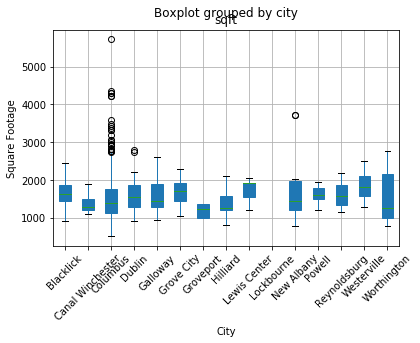

In [268]:
'''
I don't remember how to tell if there is an interaction
'''

homes.boxplot(column='sqft', by='city', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Square Footage')

Text(0.5, 1.0, 'Selling Price by Number of Bedrooms')

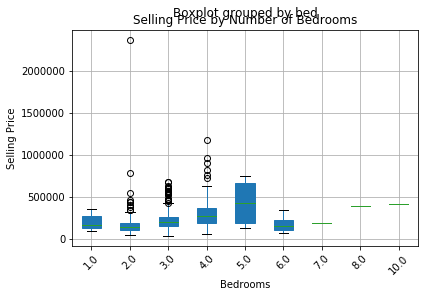

In [269]:
homes.boxplot(column='price', by='bed', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bedrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bedrooms")

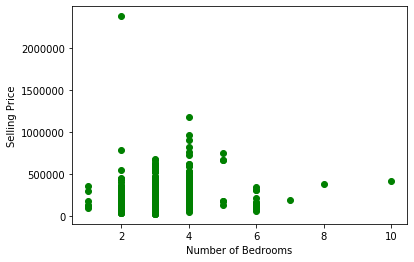

In [270]:
'''
not linear
'''

plt.scatter(homes['bed'], homes['price'], color='g')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Selling Price')
plt.show()

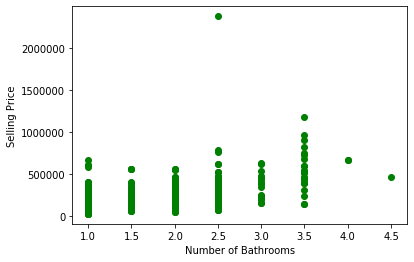

In [271]:
plt.scatter(homes['bath'], homes['price'], color='g')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Selling Price')
plt.show()

Text(0.5, 1.0, 'Selling Price by Number of Bathrooms')

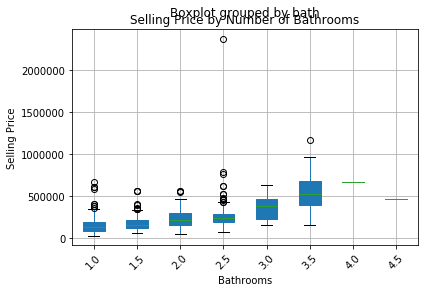

In [272]:
homes.boxplot(column='price', by='bath', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Bathrooms')
plt.ylabel('Selling Price')
plt.title("Selling Price by Number of Bathrooms")

Text(0.5, 1.0, 'Selling Price by Property Type')

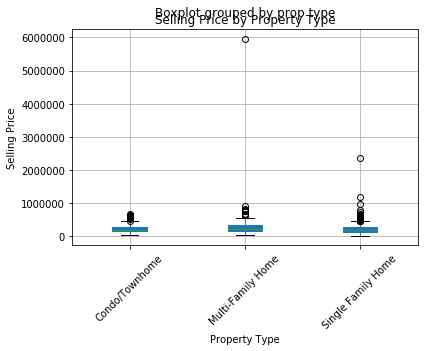

In [273]:
homes.boxplot(column='price', by='prop type', patch_artist=True)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Selling Price')
plt.title("Selling Price by Property Type")

In [274]:
homes.groupby("prop type").describe()

postal code                                             \
                         count          mean        std      min      25%   
prop type                                                                   
Condo/Townhome           219.0  43183.073059  67.423107  43004.0  43201.0   
Multi-Family Home        132.0  43180.212121  65.301769  43016.0  43182.0   
Single Family Home       415.0  43177.780723  70.337541  43004.0  43123.0   

                                               price                 ...  \
                        50%      75%      max  count           mean  ...   
prop type                                                            ...   
Condo/Townhome      43213.0  43228.0  43240.0  219.0  216719.210046  ...   
Multi-Family Home   43207.0  43221.5  43235.0  132.0  308922.727273  ...   
Single Family Home  43209.0  43223.5  43240.0  415.0  223626.346988  ...   

                      sqft         log sqft                                \
                       75%     max    count      mean       std       min   
prop type                                                                   
Condo/Townhome      1869.0  4298.0    205.0  7.290079  0.337244  6.436150   
Multi-Family Home   1889.5  4346.0    119.0  7.286196  0.386677  6.253829   
Single Family Home  1772.0  5724.0    389.0  7.273460  0.340881  6.313548   

                                                            
                         25%       50%       75%       max  
prop type                                                   
Condo/Townhome      7.078342  7.272398  7.533159  8.365905  
Multi-Family Home   7.088407  7.287561  7.544055  8.377011  
Single Family Home  7.049255  7.249215  7.479864  8.652423  

[3 rows x 48 columns]

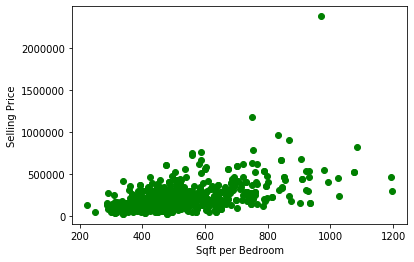

In [275]:
'''
Much more linear than bedrooms
'''
homes["sqft per bed"] = homes['sqft']/homes['bed']
plt.scatter(homes["sqft per bed"], homes['price'], color='g')
plt.xlabel('Sqft per Bedroom')
plt.ylabel('Selling Price')
plt.show()

In [276]:
homes["log sqft"] = np.log(homes["sqft"])
homes[["price", "sqft per bed", "bed"]].corr()

,price,sqft per bed,bed
price,1.000000,0.500967,0.224126
sqft per bed,0.500967,1.000000,-0.162236
bed,0.224126,-0.162236,1.000000


In [277]:
##Drop NaN values found in sqft and resetting index 
homes.dropna(inplace = True)
homes.reset_index(drop=True, inplace = True)
homes.head(5)

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000


In [278]:
# I do not want to include land properties in this analysis so I will sort them out 
homes['prop type'].unique()

# removing property type land:
homes = homes[(homes['prop type'] != 'Land')]

In [279]:
# Preparing to make ML model for SLR
x = homes['sqft'].values.reshape(-1,1)
y = homes['price'].values.reshape(-1,1)

In [280]:
# Splits data into testing vs training set then creats model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

[-12997.2387323]
[[153.7755233]]


In [281]:
# Outputs actual selling price vs model prediction
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(5)

,Actual,Predicted
0,142000,155540.734805
1,264800,296552.889671
2,150200,286557.480657
3,178000,185065.635279
4,146500,134627.263636


In [282]:
# Now I start with MLR

In [283]:
# Seeing how many homes I still have in my data set
homes.shape

(713, 9)

In [284]:
# Single Family vs not
#homes['Single Family?'] = homes.apply(lambda x: (1 if x['prop type'] == 'Single Family Home' else 0), axis=1)

In [285]:
# We have 15 unique cities- I will 
cities = homes['city'].unique()
for city in cities:
    homes[city] = homes.apply(lambda x: (1 if x['city'] == city else 0), axis=1)

In [286]:
'''
interaction with city ans sqft??
'''

'\ninteraction with city ans sqft??\n'

In [287]:
X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 'Columbus', 
          'Grove City', 'Dublin', 'Canal Winchester', 'Groveport', 
          'Worthington', 'Hilliard', 'New Albany', 'Galloway', 'Reynoldsburg', 
          'Powell', 'Lewis Center']]
Y = homes['price']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -155465.20510124564
Coefficients: 
 [ 44785.08557179     92.64841073    264.76220808   1255.84728315
 -88729.97037617  25190.34908522 -34142.22191459  30724.9366371
 -40559.80167944  51560.89301145  17283.07064738  42301.51277989
 -17170.30109975   1095.25256462 -62174.09452833  42515.34356794
  30849.18402154]


In [289]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [290]:
df.head(10)

,Actual,Predicted
338,142000,157564.433305
142,264800,303483.900147
242,150200,335891.242920
235,178000,277060.460487
468,146500,152931.106519
470,392000,460420.989716
375,429000,281579.570545
40,430000,524122.915701
365,270000,316872.739013
85,130000,181482.925422


In [291]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     27.88
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.74e-64
Time:                        20:24:52   Log-Likelihood:                -9381.2
No. Observations:                 713   AIC:                         1.880e+04
Df Residuals:                     696   BIC:                         1.887e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.163e+05   1.99e+04  

In [292]:
# We have 15 unique cities- I will 
zip_codes = homes['postal code'].unique()
for zip_code in zip_codes:
    homes[zip_code] = homes.apply(lambda x: (1 if x['postal code'] == zip_code else 0), axis=1)

homes["postal code"].unique()

array([43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035], dtype=int64)

In [302]:
homes

,prop type,city,postal code,price,bed,bath,sqft,log sqft,sqft per bed,Dublin,...,43004,43203,43222,43065,43017,43213,43202,43214,43212,43035
0,Condo/Townhome,Dublin,43016,240000,3.0,2.0,1544.0,7.342132,514.666667,1,...,0,0,0,0,0,0,0,0,0,0
1,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0,7.290293,733.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0,7.783224,800.000000,0,...,0,0,0,0,0,0,0,0,0,0
3,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0,7.629490,1029.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,Condo/Townhome,Columbus,43206,198000,2.0,1.0,1215.0,7.102499,607.500000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Multi-Family Home,Dublin,43016,280000,3.0,2.0,1758.0,7.471932,586.000000,1,...,0,0,0,0,0,0,0,0,0,0
709,Multi-Family Home,Columbus,43228,260000,4.0,2.5,1690.0,7.432484,422.500000,0,...,0,0,0,0,0,0,0,0,0,0
710,Multi-Family Home,Columbus,43219,182000,3.0,2.5,1976.0,7.588830,658.666667,0,...,0,0,0,0,0,0,0,0,0,0
711,Multi-Family Home,Columbus,43207,163000,3.0,1.0,999.0,6.906755,333.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
'''
interaction with city ans sqft??
'''

'\ninteraction with city ans sqft??\n'

In [303]:
# X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
#            'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
#            'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
#            'Reynoldsburg', 'Powell', 'Lewis Center', '43016', '43081', '43240', 
#            '43206', '43223', '43215', '43123', '43211', '43230','43110', '43209', 
#            '43227', '43201', '43205', '43219', '43228', '43125', '43085','43220', 
#            '43054', '43221', '43026', '43231', '43224', '43235', '43204', '43119',
#            '43068', '43229', '43232', '43207', '43004', '43203', '43222', '43065', 
#            '43017','43213', '43202', '43214', '43212', '43035']]

X = homes[['bath', 'sqft', 'sqft per bed', 'Westerville', 'Blacklick', 
           'Columbus', 'Grove City', 'Dublin', 'Canal Winchester', 
           'Groveport', 'Worthington', 'Hilliard', 'New Albany', 'Galloway', 
           'Reynoldsburg', 'Powell', 'Lewis Center', 43016, 43081, 43240, 43206, 43223, 43215, 43123, 43211, 43230,
       43110, 43209, 43227, 43201, 43205, 43219, 43228, 43125, 43085,
       43220, 43054, 43221, 43026, 43231, 43224, 43235, 43204, 43119,
       43068, 43229, 43232, 43207, 43004, 43203, 43222, 43065, 43017,
       43213, 43202, 43214, 43212, 43035]]

Y = homes['price']

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -53094.84020651874
Coefficients: 
 [ 3.19390585e+04  1.07343380e+02  1.03893992e+02  5.22885314e+02
 -4.07498527e+04  9.24596888e+03 -2.15851581e+04  1.18852092e+04
 -2.63922873e+04  9.38392947e+03  7.76207625e+04  1.11627501e+04
 -4.80426278e+03 -9.63174731e+03 -3.93222985e+04  1.01855571e+04
  1.24785441e+04  1.94971836e+04  5.22885314e+02 -5.58350756e+04
 -3.64460388e+04 -8.37825491e+04  3.68518175e+05 -2.15851581e+04
 -6.87698594e+04 -5.78947966e+03 -2.63922873e+04  5.85022926e+04
 -4.90896681e+04  1.22774817e+05 -3.92583774e+04 -3.57447638e+04
 -3.91860386e+04  9.38392947e+03 -8.04229983e+04  2.77947029e+04
 -4.80426278e+03  1.48668665e+05  1.11627501e+04 -3.35421613e+04
 -3.57855648e+04 -1.50295466e+03 -4.79985293e+04 -9.63174731e+03
 -3.93222985e+04 -6.00767254e+04 -7.44674446e+04 -4.45718332e+04
 -4.07498527e+04 -1.30320002e+05 -5.65627280e+04  1.01855571e+04
 -7.61197446e+03 -5.88415320e+04  9.97376243e+04  1.15134567e+05
  1.83730211e+05  1.24785441e+04]


In [305]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [306]:
df.head(10)

,Actual,Predicted
338,142000,126543.860335
142,264800,302939.372882
242,150200,253171.666908
235,178000,263301.203077
468,146500,305647.142691
470,392000,426370.064142
375,429000,349031.483556
40,430000,489772.958331
365,270000,311915.026421
85,130000,160223.960368


In [307]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     18.91
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           7.85e-90
Time:                        20:31:47   Log-Likelihood:                -9269.4
No. Observations:                 713   AIC:                         1.863e+04
Df Residuals:                     668   BIC:                         1.883e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.666e+04   2.19e+04  